<a href="https://colab.research.google.com/github/ibribr/Control-Engineering/blob/main/SAE12_7_HA_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.9/513.9 kB 4.4 MB/s eta 0:00:00


In [2]:
from control import tf, tf2ss, forced_response, pzmap, tfdata, feedback, ss
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

8001
(2, 8001)


<ipython-input-26-1579998c2eb3>:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yplt[i] = y
<ipython-input-26-1579998c2eb3>:62: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yesplt[i] = yes


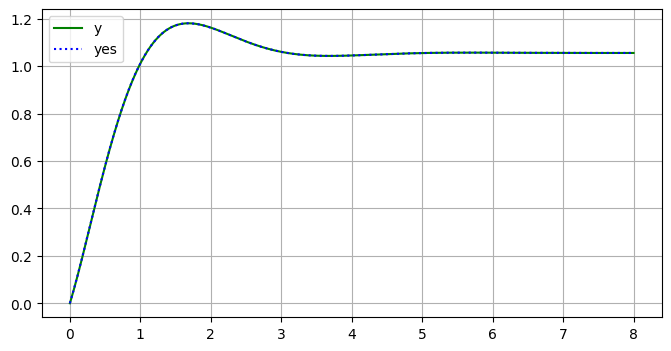

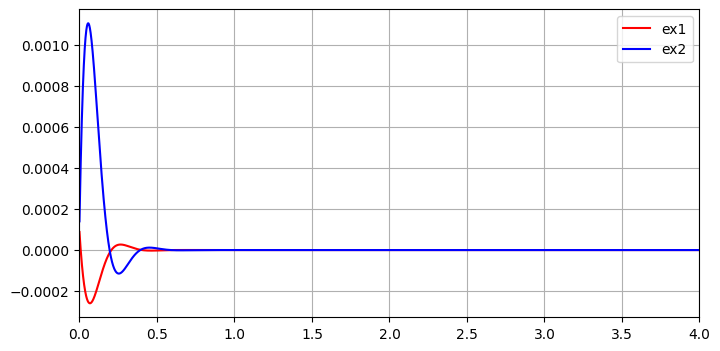

In [26]:
# Define your plant in phase variable form:
A = np.array([[0, 1],[-7, -9]])
B = np.array([[0],[1]])
C = np.array([4, 1])
D = np.array([0])
K = np.array([-3.21, -6.7])              #Kz   row vector
L = np.array([[24.31],[-83.21]])

"""
A = np.array([[0, 1],[-3, 5]])
B = np.array([[0],[1]])
C = np.array([1, 0])
D = np.array([0])
K = np.array([180.1, 11])
L = np.array([[155],[1053]])
"""
x = np.array([[0.0001],[0.0001]])#np.zeros((A.shape[0], 1))
xes = x
ex = x
yes = 0
u = 0
r = 1

# simulate
t0 = 0
t1 = 8           # remeber that Ts is 1 sec
dt = 0.001
nt = int( t1 / dt ) + 1 # Number of points of sim time
t = np.linspace(t0, t1, nt)


#print(x.reshape(-1,1))
print(t.shape[0])
rplt = np.zeros(t.shape[0])
yplt = np.zeros(t.shape[0])
rplt = np.zeros(t.shape[0])
yplt = np.zeros(t.shape[0])
yesplt = np.zeros(t.shape[0])
explt = np.zeros((A.shape[0], t.shape[0]))
print(explt.shape)

for i in range(t.shape[0]):
  # model
  xdot = np.dot(A, x) + B * u        #state equation
  x = x + xdot * dt
  y = np.dot(C,x)+ D * u             # output equation

    # observer
  xesdot = np.dot(A, xes) + B * u + L * (y-yes)
  xes = xes + xesdot * dt
  yes = np.dot(C,xes)+ D * u

  u = r - np.dot(K,xes)                 # controller using state feedback (very large staedy state error but transient response will fullfil our design requirements)
  #u = r - y                            # controller using output feedback

  #state error
  exdot = np.dot(A-L*C, ex)
  ex = ex + exdot * dt

  yplt[i] = y
  rplt[i] = r
  yesplt[i] = yes
  explt[:,i] = ex.reshape(-1)

# plot results
plt.figure(figsize=(8, 4))
plt.plot(t, yplt, 'green')
plt.plot(t, yesplt, 'blue', linestyle=':')
#plt.ylim(0, 0.002)
plt.grid()
plt.legend(['y','yes'])
plt.show()

plt.figure(figsize=(8, 4))
#plt.plot(t, explt.T, 'r')
plt.plot(t, explt[0,:], 'r')
plt.plot(t, explt[1,:], 'b')

#plt.ylim(-10**-3, 10**-3)
plt.xlim(0, 4.0)
plt.grid()
plt.legend(['ex1','ex2','ex3'])
plt.show()

Eigenvalues (Roots) of A: [-1.15+1.57082781j -1.15-1.57082781j]
Eigenvalues (Roots) of A: [-11.515+15.70206276j -11.515-15.70206276j]


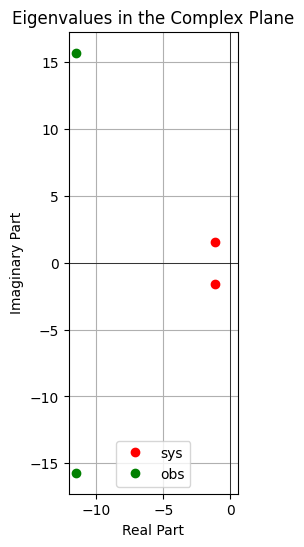

In [24]:
# plot roots (eigenvalues) of the system matrix of controlled system and observer
sys_eigenvalues, _ = np.linalg.eig(A-np.outer(B, K))

print("Eigenvalues (Roots) of A:", sys_eigenvalues)

obs_eigenvalues, _ = np.linalg.eig(A-np.outer(L, C))

print("Eigenvalues (Roots) of A:", obs_eigenvalues)

plt.figure(figsize=(10, 6))
# Plot the real part vs. the imaginary part of the eigenvalues
plt.plot(sys_eigenvalues.real, sys_eigenvalues.imag, 'ro')  # 'ro' plots red dots
plt.plot(obs_eigenvalues.real, obs_eigenvalues.imag, 'go')  # 'ro' plots red dots

# Add grid, labels, and make sure the aspect ratio is equal
plt.grid(True)
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Eigenvalues in the Complex Plane')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(['sys','obs'])

# Show the plot
plt.show()
